# import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from nilearn.input_data import NiftiLabelsMasker
from nilearn import input_data, datasets
from nilearn import plotting
from nilearn.image import new_img_like
import nilearn
import pandas as pd

### define a helper function to read the onset/name files
def read_onsets(curr_subject):
    df = pd.read_csv('../data_realcost/onsets/Onsets_RealCost_View_' + curr_subject + '.csv', encoding="ISO-8859-1") 
    df = df[df.PSA != 'Count']
    df = df[df.PSA != 'Imagine'] 
    df = df.PSA.values
    spot_names = []
    for i in range(len(df)):
        spot_names.append(df[i][:-5])
    return spot_names

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### define onsets and subjs

In [2]:
onsets_view   =  [6, 66, 127, 187, 248, 308, 369, 429, 490, 550, 611, 671]
print(len(onsets_view))

onsets_imagine = [47,108,168, 229, 289, 350, 410, 471, 531, 592, 652, 713]
print(len(onsets_imagine))

spots = ['01_The Real Cost Commercial-Your Skin',
         '02_The Real Cost Commercial-Your Teeth',
         '03_The Real Cost Commercial-Alison',
         '04_The Real Cost Commercial-Stay In Control',
         '05_The Real Cost Commercial-Bully',
         '06_The Real Cost Commercial-#7000chemicals',
         '07_The Real Cost Commercial-Dance30_2015_04_10_TESFA',
         '08_The Real Cost Commercial-Band_30_2015_04_10_TESFA',
         '09_The Real Cost Commercial-#ReasonsNotToSmoke',
         '10_The Real Cost Commercial-Any Reason',
         '11_The Real Cost Commercial-Science Class',
         '12_The Real Cost Commercial-Found It']
n_spots = len(spots)
print(n_spots)

subjs = ['PSA038','PSA009','PSA078','PSA153','PSA131','PSA086','PSA144','PSA108','PSA030','PSA041',
         'PSA068','PSA056','PSA132','PSA019','PSA027','PSA028','PSA016','PSA005','PSA061','PSA010',
         'PSA128','PSA003','PSA156','PSA119','PSA032','PSA127','PSA079','PSA094','PSA008','PSA036',
         'PSA112','PSA007','PSA151','PSA120','PSA017','PSA029','PSA026','PSA069','PSA142','PSA109']
n_subjs = len(subjs)
print(len(subjs))

view_length    = 30
imagine_length = 10
tr_shift = 4 

12
12
12
40


### load one person's fMRI data  and that person's onset-file

In [3]:
# this sets up the nested dictionary, which will later be populated with subject- and spot-wise data
subjs_spots_data = {}


# loop over subjects
for curr_subj in range(n_subjs):
    this_subj_name = subjs[curr_subj]
    print(this_subj_name)
    
    # setting up a field in the nested dictionary
    subjs_spots_data[this_subj_name] = {}

    # loop over 12 spots
    for curr_spot in range(12):
        print(curr_spot)

        # which file shall we load?
        curr_file   = '../data_realcost/' + subjs[curr_subj] + '_shen_extracted_hp001_lp012_ltr_stand.npy'

        # read this file, i.e. the 735 by 268 'data-carpet', 735 TRs (time) by 268 (regions)
        current_time_series = np.load(curr_file)
        print(current_time_series.shape)

        # read the corresponding onset-file for this subject: this will tell us when which PSA was shown etc.
        this_subj_spots = read_onsets(subjs[curr_subj])
        #print(*this_subj_spots, sep = "\n")
        #print('-----')
        print(this_subj_spots[curr_spot])

        # extract - for the current spot - the data: OF note, at this point, we're just extracting the simple mean, 
        # i.e. we average over the whole viewing/imagining duration - 30/15 seconds
        # note: might have to correct for TR-shift - double check
        view_ad_1   = np.mean(current_time_series[onsets_view[curr_spot]+tr_shift: (onsets_view[curr_spot]+view_length+tr_shift), :], axis = 0)
        #print(view_ad_1.shape)

        imagine_ad_1   = np.mean(current_time_series[onsets_imagine[curr_spot]+tr_shift: (onsets_imagine[curr_spot]+imagine_length+tr_shift), :], axis = 0)
        #print(imagine_ad_1.shape)

        # now, having extracted the data, we can add them to a dictionary for later use
        # add the new spot based on its name (this_subj_spots[curr_spot]) to the dictionary
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]] = {}

        # then populate this dictionary entry with the values 
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]]['position']     = curr_spot;    # which count 0-11 (or 1-12)
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]]['view_data']    = view_ad_1;    # the vector corresponding to viewing
        subjs_spots_data[this_subj_name][this_subj_spots[curr_spot]]['imagine_data'] = imagine_ad_1; # the vector corresponding to imagining



PSA038
0
(735, 268)
04_The Real Cost Commercial-Stay In Control
1
(735, 268)
03_The Real Cost Commercial-Alison
2
(735, 268)
01_The Real Cost Commercial-Your Skin
3
(735, 268)
05_The Real Cost Commercial-Bully
4
(735, 268)
02_The Real Cost Commercial-Your Teeth
5
(735, 268)
06_The Real Cost Commercial-#7000chemicals
6
(735, 268)
07_The Real Cost Commercial-Dance30_2015_04_10_TESFA
7
(735, 268)
12_The Real Cost Commercial-Found It
8
(735, 268)
11_The Real Cost Commercial-Science Class
9
(735, 268)
09_The Real Cost Commercial-#ReasonsNotToSmoke
10
(735, 268)
08_The Real Cost Commercial-Band_30_2015_04_10_TESFA
11
(735, 268)
10_The Real Cost Commercial-Any Reason
PSA009
0
(735, 268)
04_The Real Cost Commercial-Stay In Control
1
(735, 268)
12_The Real Cost Commercial-Found It
2
(735, 268)
10_The Real Cost Commercial-Any Reason
3
(735, 268)
08_The Real Cost Commercial-Band_30_2015_04_10_TESFA
4
(735, 268)
11_The Real Cost Commercial-Science Class
5
(735, 268)
07_The Real Cost Commercial-Dan

01_The Real Cost Commercial-Your Skin
2
(735, 268)
02_The Real Cost Commercial-Your Teeth
3
(735, 268)
03_The Real Cost Commercial-Alison
4
(735, 268)
06_The Real Cost Commercial-#7000chemicals
5
(735, 268)
10_The Real Cost Commercial-Any Reason
6
(735, 268)
09_The Real Cost Commercial-#ReasonsNotToSmoke
7
(735, 268)
12_The Real Cost Commercial-Found It
8
(735, 268)
05_The Real Cost Commercial-Bully
9
(735, 268)
11_The Real Cost Commercial-Science Class
10
(735, 268)
04_The Real Cost Commercial-Stay In Control
11
(735, 268)
08_The Real Cost Commercial-Band_30_2015_04_10_TESFA
PSA016
0
(735, 268)
06_The Real Cost Commercial-#7000chemicals
1
(735, 268)
03_The Real Cost Commercial-Alison
2
(735, 268)
01_The Real Cost Commercial-Your Skin
3
(735, 268)
10_The Real Cost Commercial-Any Reason
4
(735, 268)
08_The Real Cost Commercial-Band_30_2015_04_10_TESFA
5
(735, 268)
04_The Real Cost Commercial-Stay In Control
6
(735, 268)
11_The Real Cost Commercial-Science Class
7
(735, 268)
07_The Real 

07_The Real Cost Commercial-Dance30_2015_04_10_TESFA
1
(735, 268)
12_The Real Cost Commercial-Found It
2
(735, 268)
03_The Real Cost Commercial-Alison
3
(735, 268)
08_The Real Cost Commercial-Band_30_2015_04_10_TESFA
4
(735, 268)
05_The Real Cost Commercial-Bully
5
(735, 268)
04_The Real Cost Commercial-Stay In Control
6
(735, 268)
01_The Real Cost Commercial-Your Skin
7
(735, 268)
11_The Real Cost Commercial-Science Class
8
(735, 268)
10_The Real Cost Commercial-Any Reason
9
(735, 268)
06_The Real Cost Commercial-#7000chemicals
10
(735, 268)
02_The Real Cost Commercial-Your Teeth
11
(735, 268)
09_The Real Cost Commercial-#ReasonsNotToSmoke
PSA007
0
(735, 268)
08_The Real Cost Commercial-Band_30_2015_04_10_TESFA
1
(735, 268)
03_The Real Cost Commercial-Alison
2
(735, 268)
12_The Real Cost Commercial-Found It
3
(735, 268)
02_The Real Cost Commercial-Your Teeth
4
(735, 268)
09_The Real Cost Commercial-#ReasonsNotToSmoke
5
(735, 268)
10_The Real Cost Commercial-Any Reason
6
(735, 268)
11_

### set up nested dictionary

array([[ 1.       , -0.4695918],
       [-0.4695918,  1.       ]])

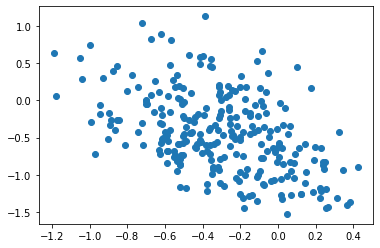

In [4]:

v = subjs_spots_data['PSA038']['04_The Real Cost Commercial-Stay In Control']['view_data'] 
i = subjs_spots_data['PSA038']['04_The Real Cost Commercial-Stay In Control']['imagine_data'] 


plt.scatter(v,i)
np.corrcoef(v, i)

In [5]:
withincorrs = []
betweencorrs = []

for curr_subj_a in range(n_subjs): #1,2,3 ...
    this_subj_a = subjs[curr_subj_a]
    #print(this_subj_a)
    
    for curr_subj_b in range(curr_subj_a+1, n_subjs):
        this_subj_b = subjs[curr_subj_b]
        #print(this_subj_a)
        #print(this_subj_b)
        
        for curr_spot_a in range(n_spots):
            this_spot_a = spots[curr_spot_a]
            #print(this_spot_a)
            
            for curr_spot_b in range(curr_subj_a, n_spots):
                this_spot_b = spots[curr_spot_b]
                #print(this_spot_b)
                
                view_a =  subjs_spots_data[this_subj_a][this_spot_a]['view_data'] 
                view_b =  subjs_spots_data[this_subj_b][this_spot_b]['view_data'] 
                c_ab = np.corrcoef(view_a, view_b)[0,1]
                
                if (this_spot_a == this_spot_b):
                    #print('---')
                    #print('match')
                    #print(this_spot_a)
                    #print(this_spot_b)
                    #print('---')
                    withincorrs.append(c_ab)
                else:
                    betweencorrs.append(c_ab)


                
        
        #print('----')
    #print('----')

In [6]:
w = np.asarray(withincorrs)
b = np.asarray(betweencorrs)
len(w)

2756

In [7]:
np.mean(withincorrs)

0.31652091639471136

In [8]:
np.mean(betweencorrs)

0.2508461622719647

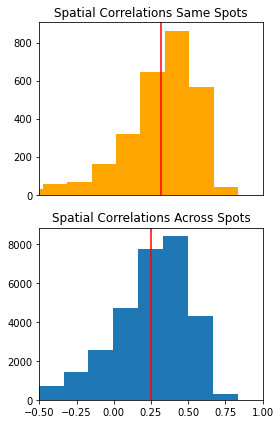

In [12]:
plt.figure(figsize = (4,6))
plt.subplot(2,1,1)
plt.hist(withincorrs, color = 'orange')
plt.axvline(np.mean(withincorrs), color = 'r')
plt.title('Spatial Correlations Same Spots')
plt.xlim(-.5,1)
plt.xticks([])


plt.subplot(2,1,2)
plt.hist(betweencorrs)
plt.axvline(np.mean(betweencorrs), color = 'r')
plt.xlim(-.5,1)
plt.title('Spatial Correlations Across Spots')
plt.tight_layout()



In [13]:
import scipy
scipy.stats.ttest_ind(withincorrs, betweencorrs)

Ttest_indResult(statistic=13.158295474145326, pvalue=1.916210370065295e-39)

In [ ]:
v = subjs_spots_data['PSA038']['04_The Real Cost Commercial-Stay In Control']['view_data'] 
i = subjs_spots_data['PSA009']['04_The Real Cost Commercial-Stay In Control']['view_data'] 


plt.scatter(v,i)
np.corrcoef(v, i)